<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-04-22 12:32:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.16’

m4_survey_data.sqli 100%[===================>]  34.98M  6.21MB/s    in 5.6s    

2023-04-22 12:32:21 (6.21 MB/s) - ‘m4_survey_data.sqlite.16’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

In [31]:
QUERY = """
SELECT Respondent,COUNT(*) as NumberOfLanguages
FROM LanguageWorkedWith
group by respondent
order by NumberOfLanguages
"""
dataframe=pd.read_sql_query(QUERY,conn)
dataframe


,Respondent,NumberOfLanguages
0,207,1
1,224,1
2,383,1
3,402,1
4,426,1
...,...,...
11382,10544,17
11383,15378,17
11384,21543,17
11385,2482,18


In [32]:
QUERY = """
SELECT Respondent, ConvertedComp
FROM master

"""
dataframe2 = pd.read_sql_query(QUERY,conn)
dataframe2.head()

In [56]:
merged_df = pd.merge(dataframe, dataframe2, on="Respondent")
print(merged_df)
merged_df.groupby('NumberOfLanguages').mean('ConvertedComp')



       Respondent  NumberOfLanguages  ConvertedComp
0             207                  1        57349.0
1             224                  1       233000.0
2             383                  1       140000.0
3             402                  1       110509.0
4             426                  1            NaN
...           ...                ...            ...
11382       10544                 17         8700.0
11383       15378                 17       200000.0
11384       21543                 17         4080.0
11385        2482                 18      1000000.0
11386       10245                 19         6563.0

[11387 rows x 3 columns]


,Respondent,ConvertedComp
NumberOfLanguages,,
1,12707.114198,87647.962712
2,12447.550640,114955.507500
3,12613.487445,132806.221959
4,12538.495301,121521.171616
5,12532.382613,136668.377678
6,12394.545294,143018.804569
7,12495.660494,139882.032412
8,12236.911932,144614.357698
9,12315.450472,153016.334184


Text(0.5, 1.0, 'Correlation between number of used programming languages and wage level')

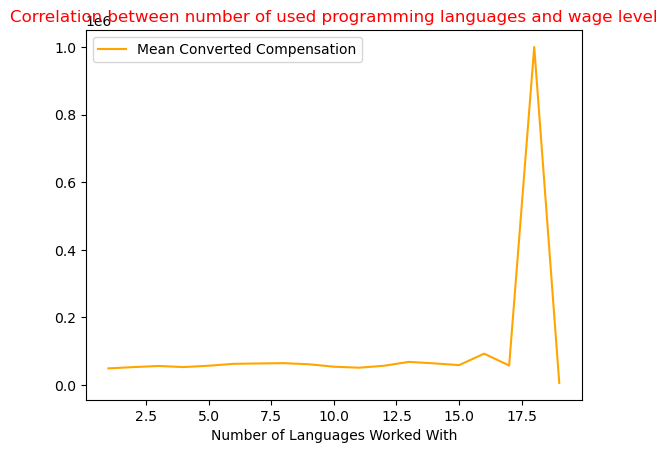

In [67]:
corr.plot(kind='line', y='ConvertedComp', color='orange')
plt.pyplot.legend(['Mean Converted Compensation'])
plt.pyplot.xlabel("Number of Languages Worked With")
plt.pyplot.title("Correlation between number of used programming languages and wage level", color='red')

In [24]:
dataframe['NumberOfLanguages'].plot(kind='hist', bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], color="bisque", edgecolor='orange')
plt.pyplot.xticks(range(20))
plt.pyplot.xlabel('Number of languages worked with')

Text(0.5, 0, 'Number of databases worked with')

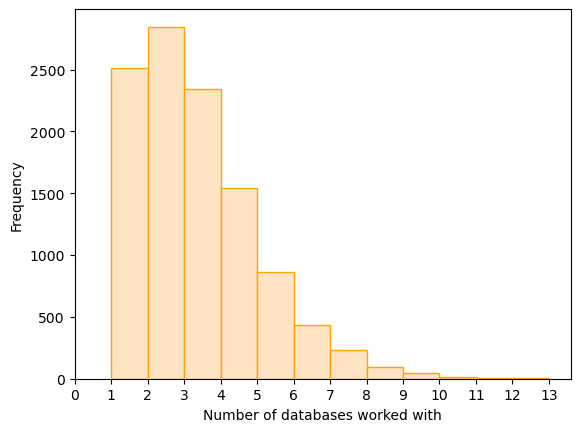

In [70]:
QUERY = """
SELECT Respondent,COUNT(*) as NumberOfDatabases
FROM DatabaseWorkedWith
group by respondent
order by NumberOfDatabases
"""
dataframe1=pd.read_sql_query(QUERY,conn)
dataframe1['NumberOfDatabases'].plot(kind='hist', bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], color="bisque", edgecolor='orange')
plt.pyplot.xticks(range(14))
plt.pyplot.xlabel('Number of databases worked with')

In [71]:
dataframe1.groupby('NumberOfDatabases').count()

,Respondent
NumberOfDatabases,
1,2515
2,2846
3,2345
4,1545
5,864
6,437
7,232
8,94
9,44


In [86]:
merged_df2 = pd.merge(dataframe1, dataframe2, on="Respondent")
print(merged_df2)
merged_df2.corr()['ConvertedComp']

       Respondent  NumberOfDatabases  ConvertedComp
0              25                  1         6300.0
1              38                  1        51312.0
2              70                  1        75000.0
3              74                  1       114575.0
4              75                  1        17491.0
...           ...                ...            ...
10940       10222                 11        14300.0
10941       10982                 11        30935.0
10942       22329                 11       120000.0
10943       11365                 12       120000.0
10944       21878                 12       140000.0

[10945 rows x 3 columns]


Respondent          -0.000049
NumberOfDatabases   -0.006128
ConvertedComp        1.000000
Name: ConvertedComp, dtype: float64

Text(0.5, 1.0, 'Correlation between number of used databases and wage level')

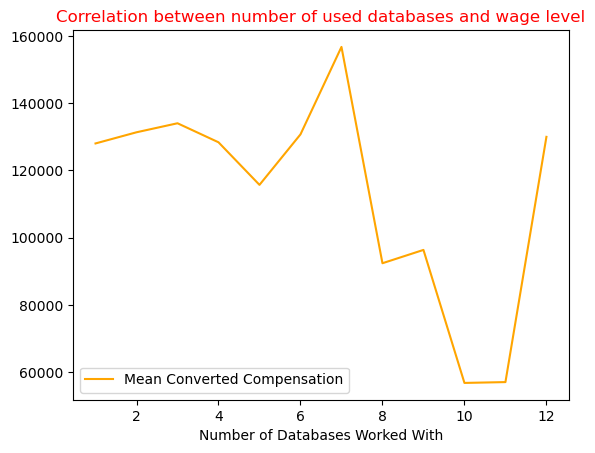

In [81]:
corr2.plot(kind='line', y='ConvertedComp', color='orange')
plt.pyplot.legend(['Mean Converted Compensation'])
plt.pyplot.xlabel("Number of Databases Worked With")
plt.pyplot.title("Correlation between number of used databases and wage level", color='red')

## Demo: How to describe a table


In [13]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


Text(0, 0.5, 'Frequency')

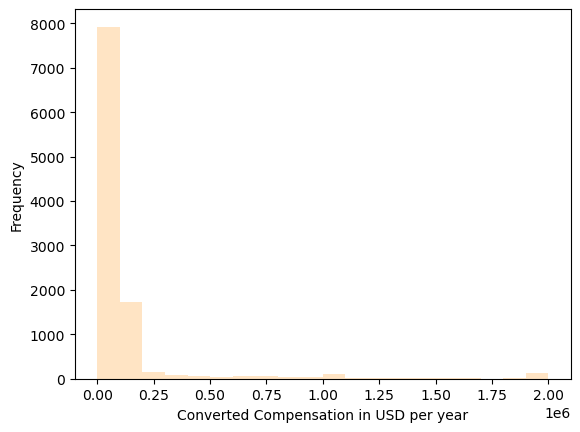

In [8]:
# your code goes here
QUERY = """
SELECT *
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

import matplotlib as plt
#import numpy as np
#count, bin_edges=np.histogram(np.isfinite(df['ConvertedComp']))
#df[np.isfinite(df['ConvertedComp'])].plot(kind='hist', bins=bin_edges, legend=None, color="bisque")
df['ConvertedComp'].plot(kind='hist', bins=20, color="bisque")
plt.pyplot.xlabel("Converted Compensation in USD per year")
plt.pyplot.ylabel("Frequency")

### Box Plots


Plot a box plot of `Age.`


Text(0.5, 1.0, 'Box Plot of Age')

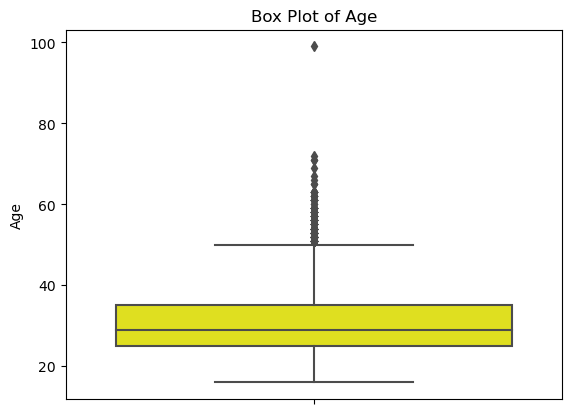

In [9]:
# your code goes here

import seaborn as sns
sns.boxplot(y=df['Age'], color='yellow').set_title('Box Plot of Age')

Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:title={'center':'Scatter plot of age and workweek hours'}, xlabel='Age', ylabel='WorkWeekHrs'>

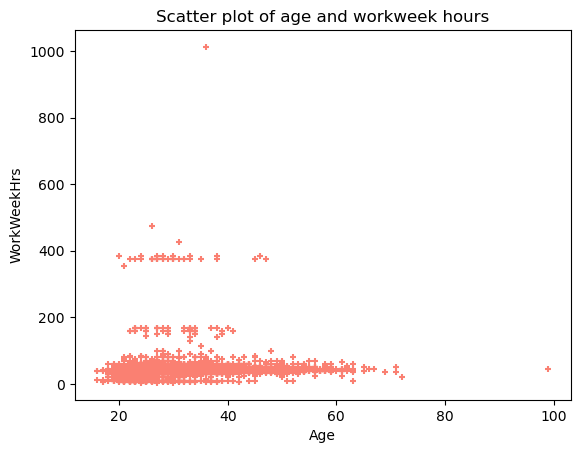

In [13]:
# your code goes here
df.plot(x='Age', y='WorkWeekHrs', kind='scatter', color='salmon', marker="+", title='Scatter plot of age and workweek hours')


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='CodeRevHrs', ylabel='WorkWeekHrs'>

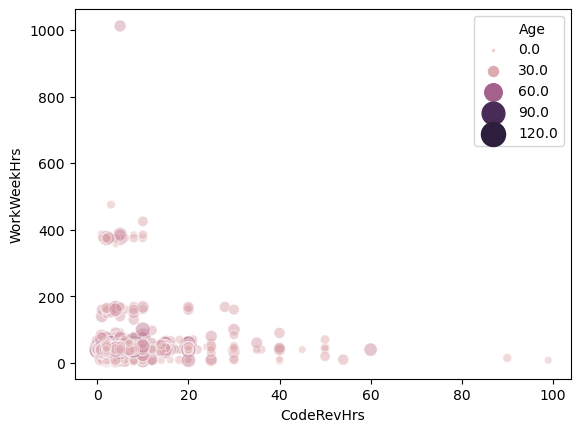

In [12]:
# your code goes here
sns.scatterplot(data=df, x="CodeRevHrs", y="WorkWeekHrs", size="Age", hue="Age", sizes=(2,300), alpha=0.5)


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


Text(0, 0.5, 'Number of respondents')

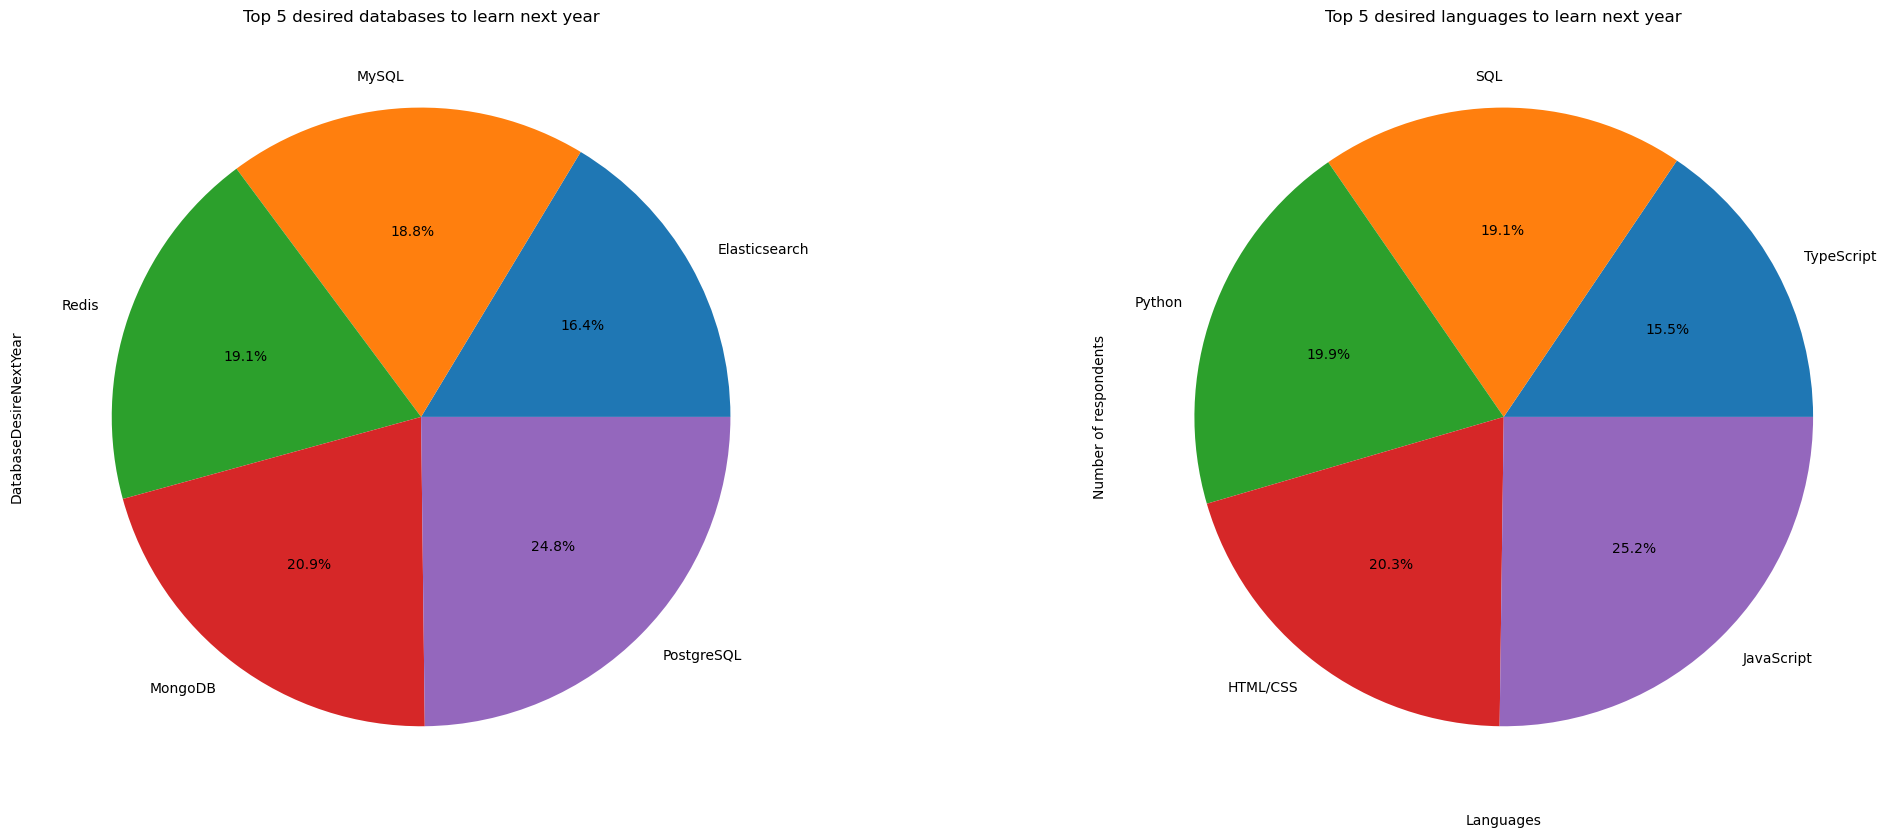

In [24]:
# your code goes here
fig=plt.pyplot.figure()
ax0=fig.add_subplot(1, 2, 1)
ax1=fig.add_subplot(1, 2, 2)
plt.pyplot.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=3,
                    top=2,
                    wspace=0.4,
                    hspace=0.4)

QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
df2 = pd.read_sql_query(QUERY,conn)
df2top5=df2['DatabaseDesireNextYear'].value_counts().sort_values().tail(5)
df2top5
df2top5.plot(kind='pie', autopct='%1.1f%%', ax=ax0)
ax0.set_title('Top 5 desired databases to learn next year')


QUERY = """
SELECT *
FROM LanguageDesireNextYear
"""
df3 = pd.read_sql_query(QUERY,conn)
df3top5=df3['LanguageDesireNextYear'].value_counts().sort_values().tail(5)
df3top5.plot(kind='pie', autopct='%1.1f%%', ax=ax1)
ax1.set_title('Top 5 desired languages to learn next year')
ax1.set_xlabel('Languages')
ax1.set_ylabel('Number of respondents')

In [26]:
#QUERY = """
#SELECT *
#FROM LanguageWorkedWith
#"""
#df111=pd.read_sql_query(QUERY,conn)
#df111top5=df111['LanguageWorkedWith'].value_counts().sort_values().tail(5)
#df111top5.plot(kind='bar',  color='lightgreen',  edgecolor='green', label='Inline label')
#plt.pyplot.xlabel('Languages')
#plt.pyplot.ylabel('Number of respondents')
#plt.pyplot.title('Top 5 languages worked with this year')

QUERY = """
SELECT *
FROM LanguageDesireNextYear
"""
df3 = pd.read_sql_query(QUERY,conn)
df3top5=df3['LanguageDesireNextYear'].value_counts().sort_values().tail(5)
df3top5

#df2top5.plot(kind='bar', color='lightgreen',  edgecolor='green')
#plt.pyplot.title('Top 5 databases worked with this year')
#plt.pyplot.xlabel('Databases')
#plt.pyplot.ylabel('Number of respondents')

TypeScript    4088
SQL           5012
Python        5239
HTML/CSS      5328
JavaScript    6630
Name: LanguageDesireNextYear, dtype: int64

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [139]:
# your code goes here
QUERY = """
SELECT Respondent, DatabaseWorkedWith, Count(*) AS Count
FROM DatabaseWorkedWith
GROUP BY Respondent
HAVING Count = 1 
   AND DatabaseWorkedWith = 'MySQL'
"""
df5 = pd.read_sql_query(QUERY,conn)
df5.shape

(474, 3)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


Text(0, 0.5, 'Hours')

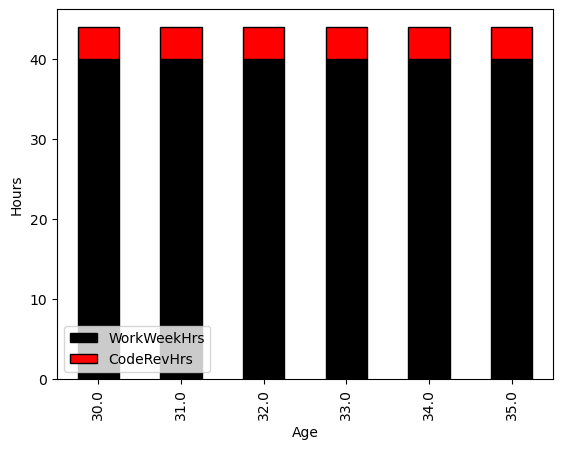

In [40]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE (AGE BETWEEN 30 AND 35)
"""
df6=pd.read_sql_query(QUERY,conn)
stacked_bar=df6.groupby('Age')['WorkWeekHrs', 'CodeRevHrs'].median()
stacked_bar.plot(kind='bar', stacked=True, color=['black', 'red'], edgecolor='black')
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('Hours')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


Text(0, 0.5, 'Converted Compensation, USD per year')

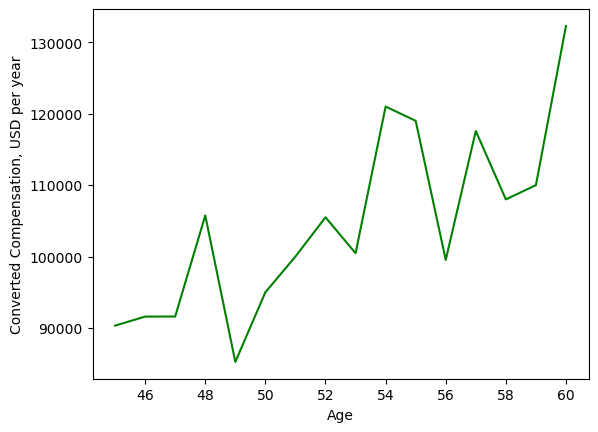

In [47]:
# your code goes here
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE (AGE BETWEEN 45 AND 60)
"""
df7=pd.read_sql_query(QUERY,conn)
df7.groupby('Age')['ConvertedComp'].median().plot(kind='line', color='green')
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('Converted Compensation, USD per year')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:ylabel='MainBranch'>

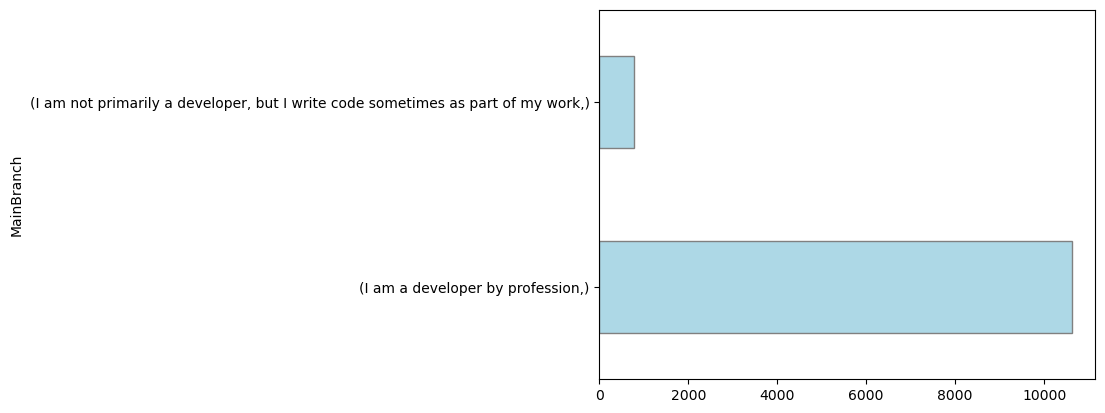

In [14]:
# your code goes here
QUERY = """
SELECT MainBranch
FROM master
"""
df8 = pd.read_sql_query(QUERY,conn)
df8.value_counts().plot(kind='barh', color='lightblue', edgecolor='grey')

Text(0.5, 0, 'Number of respondents')

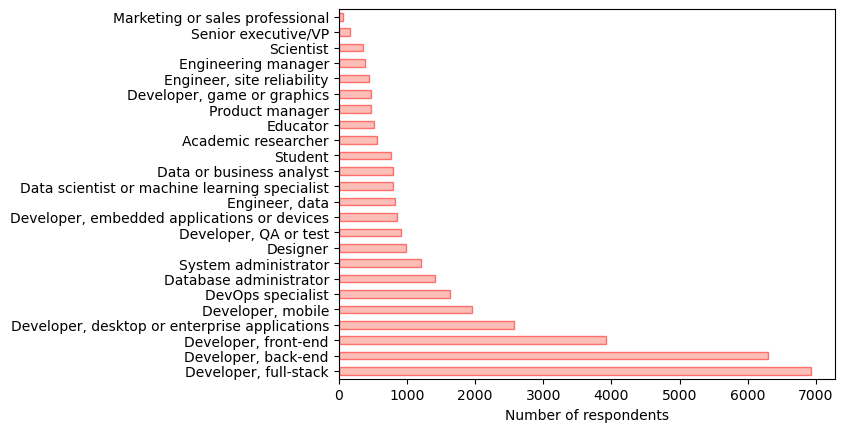

In [13]:
QUERY = """
SELECT DISTINCT DevType, Respondent
FROM DevType
"""
df8 = pd.read_sql_query(QUERY,conn)
df8['DevType'].value_counts().plot(kind='barh', color='salmon', edgecolor='red', alpha=0.5)
plt.pyplot.xlabel('Number of respondents')

Close the database connection.


In [15]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
